In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../datasets/Carseats.csv', index_col=0)


In [31]:
# Create classification
y = df.Sales.apply(lambda x: 'N' if x <= 8 else 'Y').astype('category')

X = df.copy()
X.drop(columns=['Sales'], inplace=True)

In [32]:
# Encode categorical values 
le = LabelEncoder()
X.ShelveLoc = le.fit_transform(X.ShelveLoc)
X.Urban = le.fit_transform(X.Urban)
X.US = le.fit_transform(X.US)

In [139]:
# Fit data on classifier
m = tree.DecisionTreeClassifier(max_depth=j)
m_tree = m.fit(X, y)

In [142]:
# Check training error
from sklearn.metrics import confusion_matrix
y_hat = m_tree.predict(X)


m_tree.score(X,y)

0.985

<AxesSubplot:xlabel='depth'>

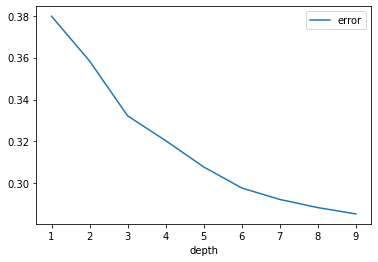

In [150]:
# Cross validate based on depth to see which number returns the lowest estimated test error
from sklearn.model_selection import cross_val_score

error_list_fold = []
error_list_depth = []
folds = np.arange(3,50).tolist()
max_depth = np.arange(1, len(X.columns)).tolist()
for j in max_depth:
    m = tree.DecisionTreeClassifier(max_depth=j)
    m_tree = m.fit(X, y)
    for i in folds:
        cv_error = np.mean(1-cross_val_score(m, X, y, scoring='accuracy', cv=i))
        # print(f'KFold: {i}, Depth: {j} -- {cv_error}')
        error_list_fold.append(cv_error)
    error_list_depth.append(np.mean(error_list_fold))

error_df = pd.DataFrame({'depth': max_depth, 'error': error_list_depth})

error_df.plot.line(x='depth', y='error')
        

    

<AxesSubplot:xlabel='fold'>

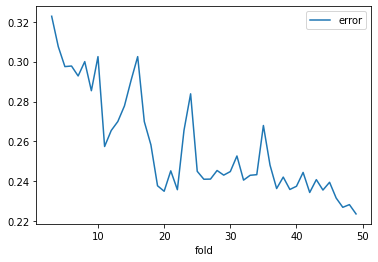

In [156]:
m = tree.DecisionTreeClassifier(max_depth=5)
m_tree = m.fit(X, y)

error_list = []
for i in folds:
        cv_error = np.mean(1-cross_val_score(m, X, y, scoring='accuracy', cv=i))
        # print(f'KFold: {i}, Depth: {j} -- {cv_error}')
        error_list.append(cv_error)
        
error_df = pd.DataFrame({'fold': folds, 'error': error_list})

error_df.plot.line(x='fold',y='error')


# Regression Trees

In [161]:
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('../datasets/Boston.csv', index_col=0)

y = df.medv
X = df.loc[:, 'crim':'lstat']

<AxesSubplot:xlabel='names'>

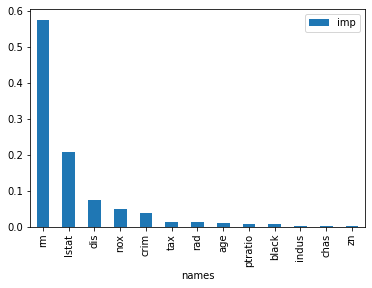

In [199]:
# fit model
import numpy as np
from matplotlib import pyplot as plt


m = DecisionTreeRegressor(max_depth=len(X.columns))
m = m.fit(X,y)

imp = m.feature_importances_
names = m.feature_names_in_

imp_df = pd.DataFrame({'names': names, 'imp': imp})
imp_df.sort_values(by='imp', ascending=False).plot.bar(x='names', y='imp')

In [202]:
# Calculate training error

np.mean(y_hat-y)


0.0